In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
#mouse_drug = "data/mouse_drug_data.csv"
#clinicaltrial_data = "/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")
clinical_data = pd.read_csv("clinicaltrial_data.csv")


# Combine the data into a single dataset
clinical_data_whole = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_data_whole.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean = clinical_data_whole.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_volume_mean = pd.DataFrame(tumor_volume_mean)

# Preview DataFrame
tumor_volume_mean

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_standerror = clinical_data_whole.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_volume_standerror = pd.DataFrame(tumor_volume_standerror)
# Preview DataFrame

tumor_volume_standerror.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean = tumor_volume_mean.reset_index()
tumor_volume_pivot_mean = tumor_volume_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_volume_standerror = tumor_volume_standerror.reset_index()
tumor_volume_pivot_standerror = tumor_volume_standerror.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_volume_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


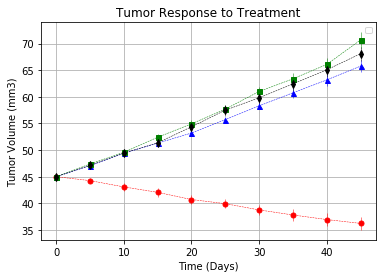

In [8]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_volume_pivot_mean.index, tumor_volume_pivot_mean["Capomulin"], yerr=tumor_volume_pivot_standerror["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_volume_pivot_mean.index, tumor_volume_pivot_mean["Infubinol"], yerr=tumor_volume_pivot_standerror["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_volume_pivot_mean.index, tumor_volume_pivot_mean["Ketapril"], yerr=tumor_volume_pivot_standerror["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_volume_pivot_mean.index, tumor_volume_pivot_mean["Placebo"], yerr=tumor_volume_pivot_standerror["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Figure1.png")



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_sites_mean = clinical_data_whole.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
metastatic_sites_mean = pd.DataFrame(metastatic_sites_mean)

# Preview DataFrame
metastatic_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sites_standerror = clinical_data_whole.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
metastatic_sites_standerror = pd.DataFrame(metastatic_sites_standerror)

# Preview DataFrame
metastatic_sites_standerror.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites_mean = metastatic_sites_mean.reset_index()
metastatic_sites_pivot_mean = metastatic_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

metastatic_sites_standerror = metastatic_sites_standerror.reset_index()
metastatic_sites_pivot_standerror = metastatic_sites_standerror.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]


# Preview that Reformatting worked
tumor_volume_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


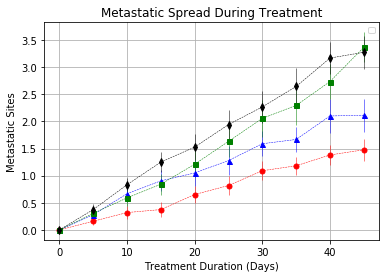

In [15]:
# Generate the Plot (with Error Bars)
plt.errorbar(metastatic_sites_pivot_mean.index, metastatic_sites_pivot_mean["Capomulin"], yerr=metastatic_sites_pivot_standerror["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_sites_pivot_mean.index, metastatic_sites_pivot_mean["Infubinol"], yerr=metastatic_sites_pivot_standerror["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_sites_pivot_mean.index, metastatic_sites_pivot_mean["Ketapril"], yerr=metastatic_sites_pivot_standerror["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_sites_pivot_mean.index, metastatic_sites_pivot_mean["Placebo"], yerr=metastatic_sites_pivot_standerror["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)


# Save the Figure
plt.savefig("Figure2.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = clinical_data_whole.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
mice_count = pd.DataFrame({"Mice Count": mice_count})
# Preview DataFrame
mice_count.head()

Mice Count
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

In [17]:
# Minor Data Munging to Re-Format the Data Frames
mice_count = mice_count.reset_index()
mice_count_pivot = mice_count.pivot(index="Timepoint", columns="Drug")["Mice Count"]

# Preview the Data Frame
mice_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


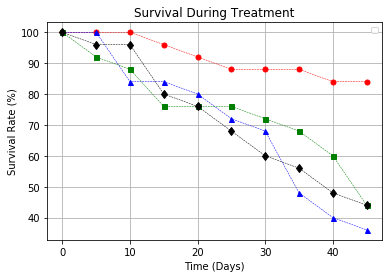

In [18]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mice_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_count_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_count_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Figure3.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
tumor_percent_change =  100 * (tumor_volume_pivot_mean.iloc[-1] - tumor_volume_pivot_mean.iloc[0]) / tumor_volume_pivot_mean.iloc[0]
tumor_percent_change_standerror =  100 * (tumor_volume_pivot_standerror.iloc[-1] - tumor_volume_pivot_standerror.iloc[0]) / tumor_volume_pivot_standerror.iloc[0]

# Display the data to confirm
tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

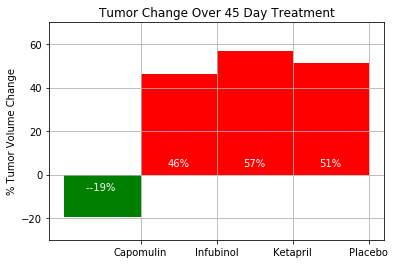

In [23]:
# Store all Relevant Percent Changes into a Tuple
percent_change = (tumor_percent_change["Capomulin"],
               tumor_percent_change["Infubinol"],
               tumor_percent_change["Ketapril"],
               tumor_percent_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_change))
width = 1
rectsPass = ax.bar(ind[0], percent_change[0], width, color='green')
rectsFail = ax.bar(ind[1:], percent_change[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")


# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)


# Save the Figure
fig.savefig("Figure4.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)